In [1]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
import matplotlib.patches as mpatches

In [4]:
# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

In [6]:
# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


In [9]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])

In [11]:
missing_data.head(10)

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [13]:
missing_data.shape

(693, 2)

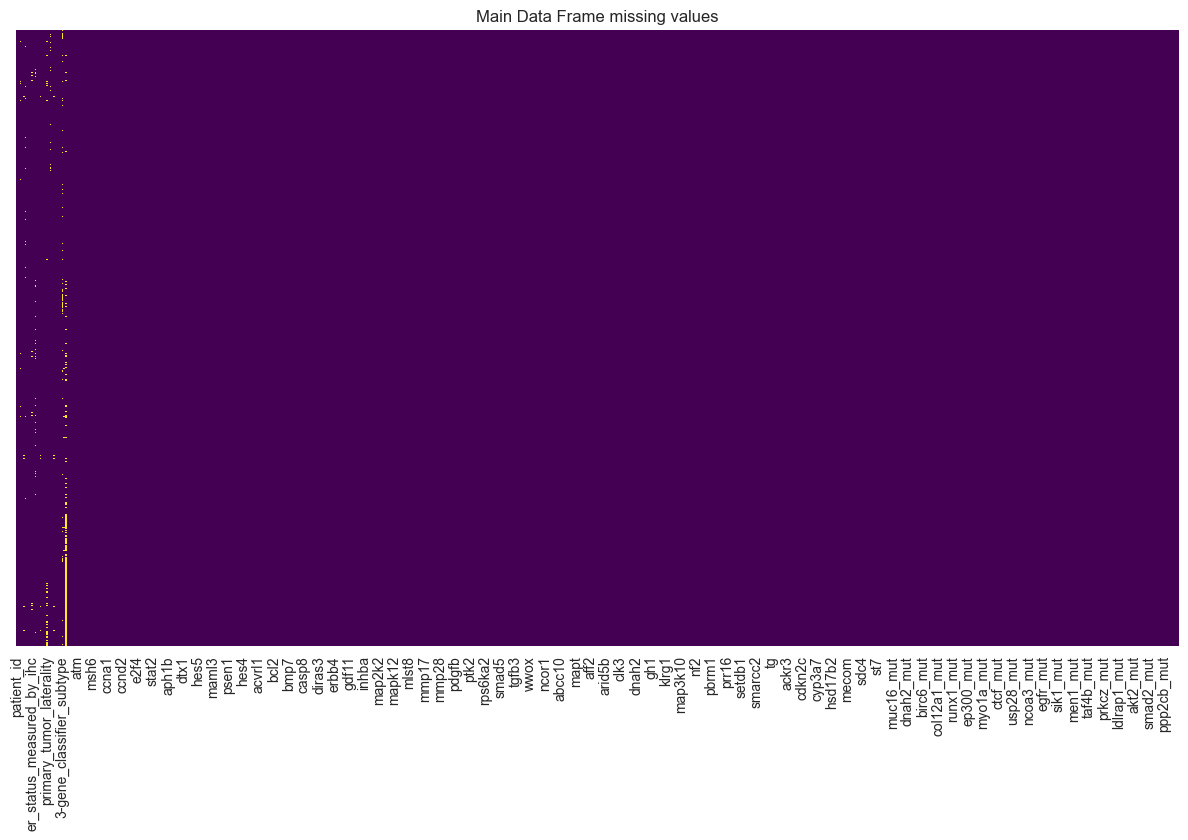

In [14]:
# Visualization of missing data
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame missing values')
plt.show()

The genetic data in the dataframe is complete with no missing data. However, the clinical data has some categorical clinical features that had up to 26% missing data (tumor_stage column has 26% missing data, while 3-gene_classifier_subtype has 10.7% missing data, and primary_tumor_laterality contains 3.7% missing data). There are 9 features that contains around 3 -0.001% missing data, and the rest of the features are complete.

### Exploratory Data Analysis and Data Visualization

a) Relationship between clinical attributes and outcomes

In [15]:
# create a new dataframe for clinical attributes only
clinical_features_to_drop = df.columns[31:] # fetching non clinical attributes
clinical_df = df.drop(clinical_features_to_drop, axis=1)
clinical_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [17]:
## aleternate way to get the clinical_df
df.iloc[:, :31].head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [18]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [19]:
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

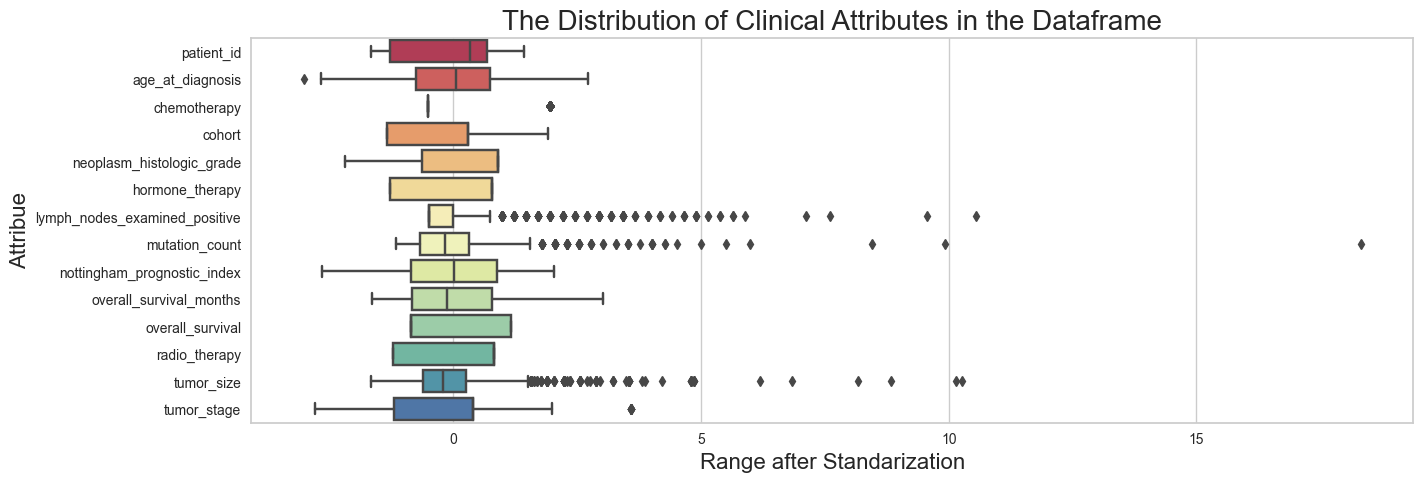

In [20]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


plt.show()

For the distribution of all numerical data, some of them are normally distributed (like tumor_stage, and age_at_diagnosis), but most of the features are right skewed with a lot of outliers (lymph_nodes_examined_positive, mutation_count, and tumor_size). We decided to keep the outliers, as they are very important in healthcare data.

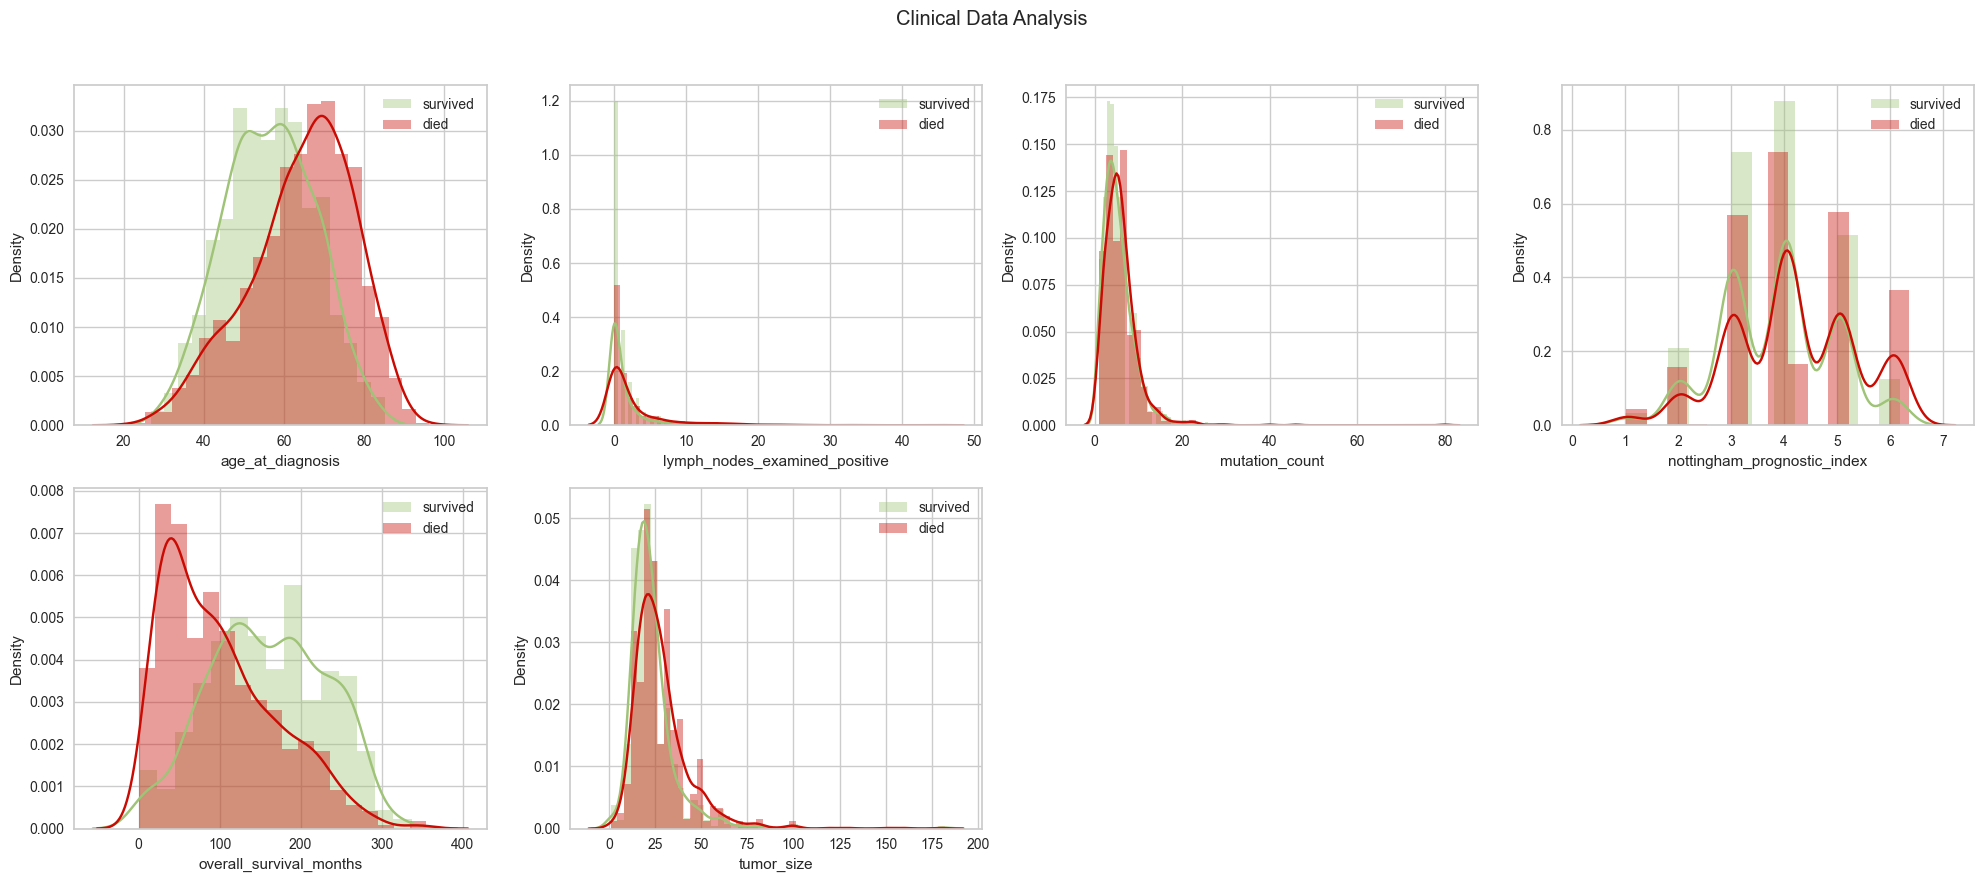

In [21]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in clinical_df[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [22]:
died = clinical_df[clinical_df['overall_survival']==0]
survived = clinical_df[clinical_df['overall_survival']==1]

alive = clinical_df[clinical_df['death_from_cancer']=='Living']
died_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Other Causes']

In [24]:
color= "Spectral"
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
two_colors


[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

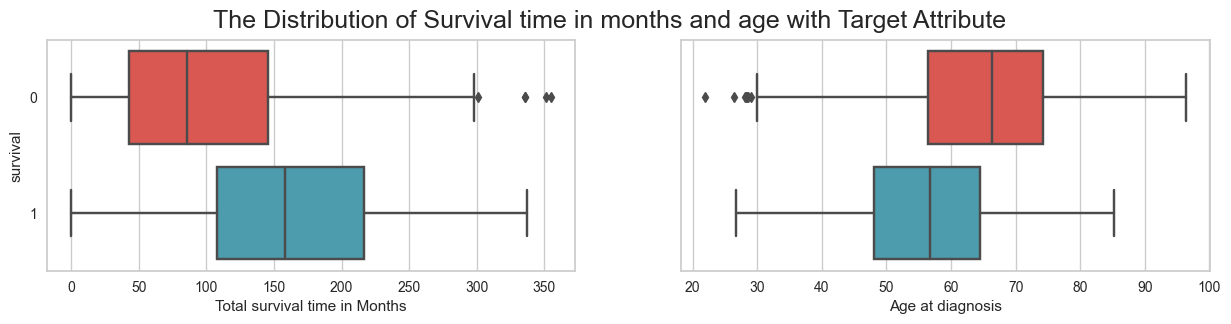

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

To compare between the two classes of patients who survived and patients who did not, we can see the difference between the two distributions in age_at_diagnosis column, as patients who were younger when diagnosed with breast cancer were more likely to survive. Also, the duration from the time of the intervention to death or to current time is longer in the patients who survive. That means that pateints are either dying early from breast cancer or surviving.

In [27]:
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

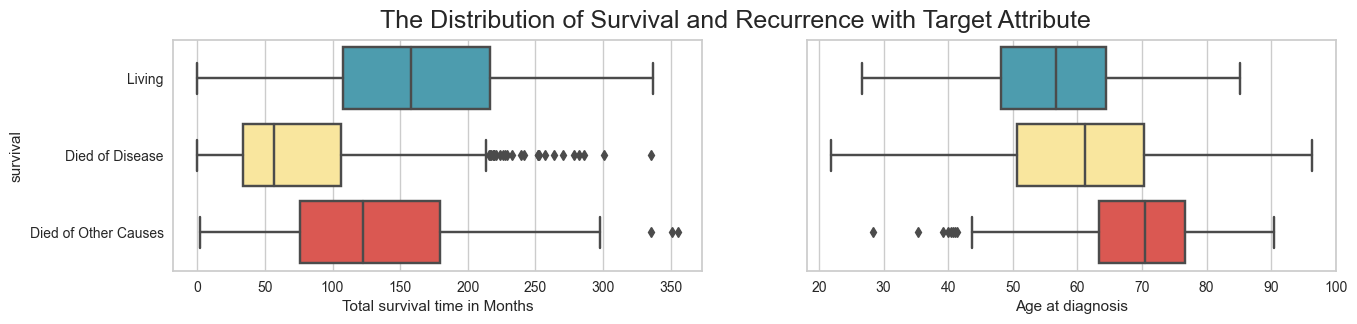

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

The variable 'death_from_cancer' shows us if the patient is alive or died from cancer or its complications or died of other causes. From the distribution of the three classes, we can see that the median of the survival time in months of patients who died from breast cancer is low compared to the other two classes, and its distribution os right-skewed with a lot of outliers. Also, patients who died from other causes than cancer tend to be older than the other two classes. The distribution of it is left-skewed with some younger outliers.

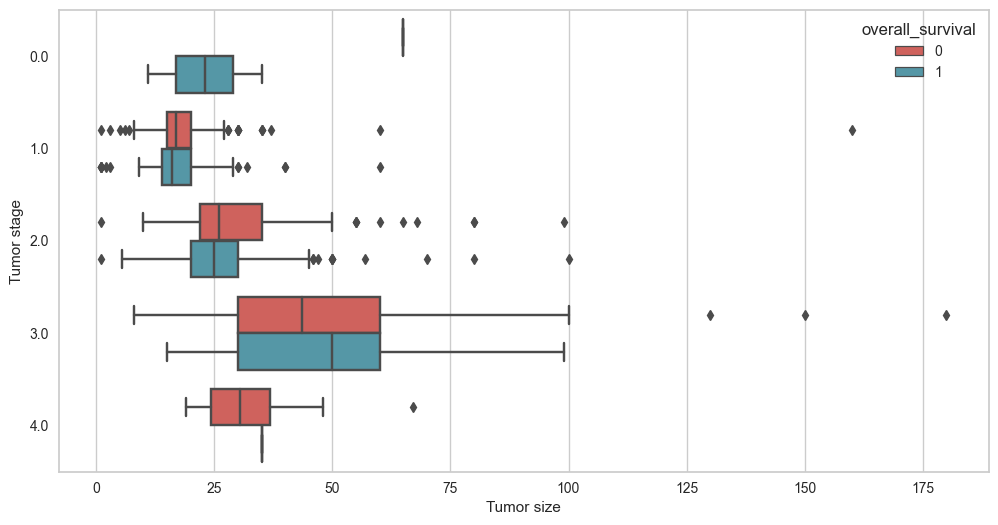

In [29]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_size', y ='tumor_stage',  data = clinical_df, orient='h', hue='overall_survival', palette=two_colors)

ax.set_ylabel('Tumor stage')
ax.set_xlabel('Tumor size')
fig.suptitle('Tumor stage vs. Tumor size and overall_survival', fontsize=20)

#legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As the Tumer stage increases the tumor size increases as well. Also, if lower tumor stages the probability of survival is higher than when the patient reaches the fourth stage

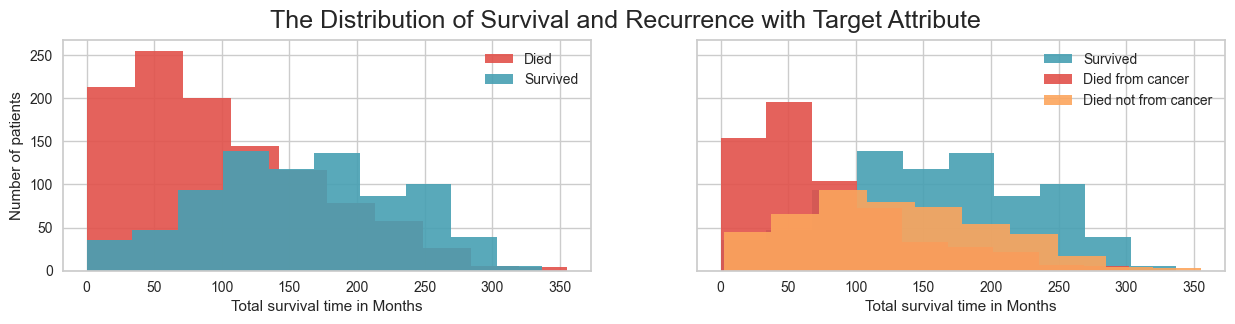

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

When the total survival time in months increases, the probability of survival increases as well, and the probability of dying from reasons other than cancer decrease with time slightly.

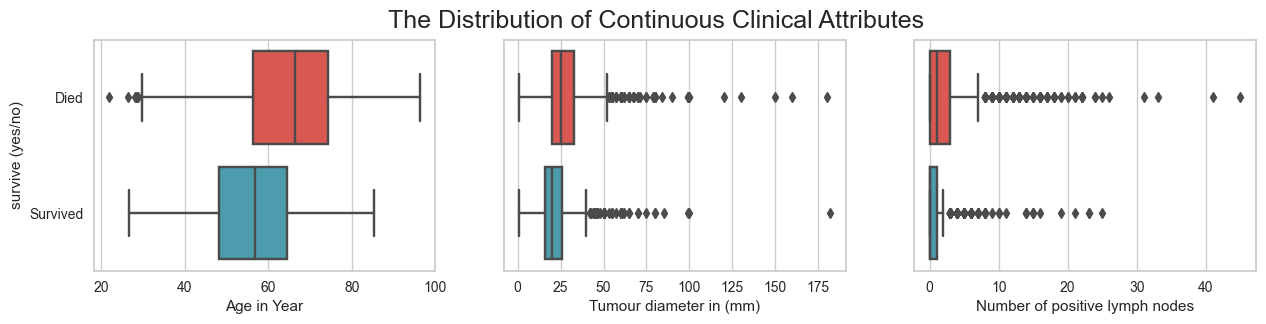

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3), sharey=True)

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=clinical_df, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

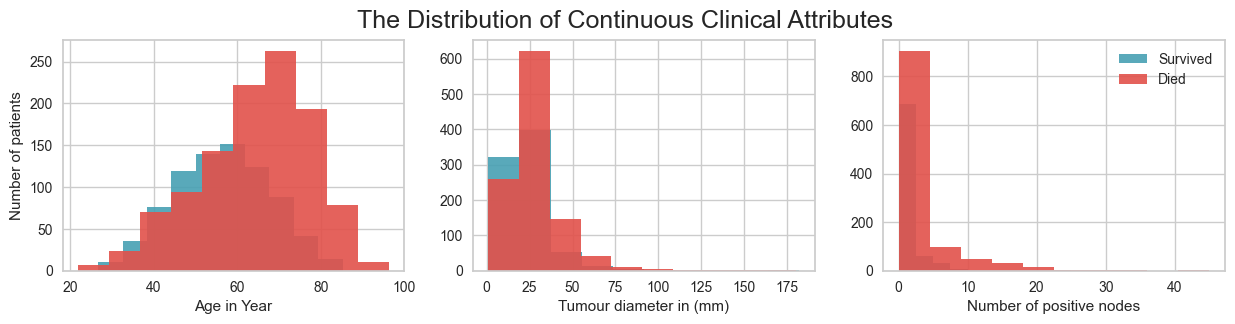

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

The median of tumor size and the number of positive lymph nodes is lower in the survived class than the died class.

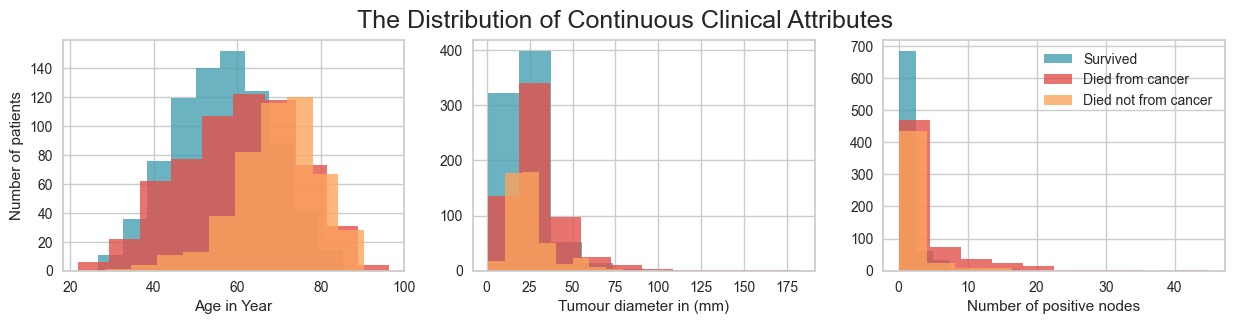

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(alive['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[0].hist(died_not_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[0].legend()

ax[1].hist(alive['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[2].hist(died_not_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

In [35]:
died.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0,Died of Other Causes
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,5.032,IDC,36.566667,0,Negative,1,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes


In [43]:
died['chemotherapy']

2       1
4       1
5       0
7       0
8       0
       ..
1898    0
1900    0
1901    0
1902    0
1903    0
Name: chemotherapy, Length: 1103, dtype: int64

<Axes: xlabel='chemotherapy', ylabel='count'>

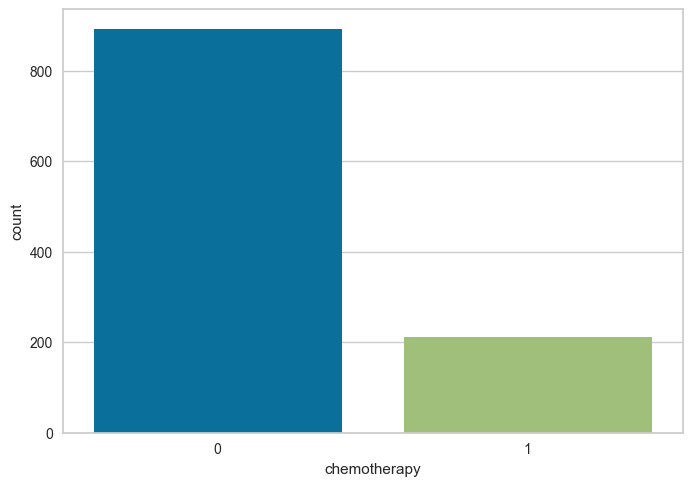

In [45]:
sns.countplot(x= died['chemotherapy'], label='Died', saturation=0.90)

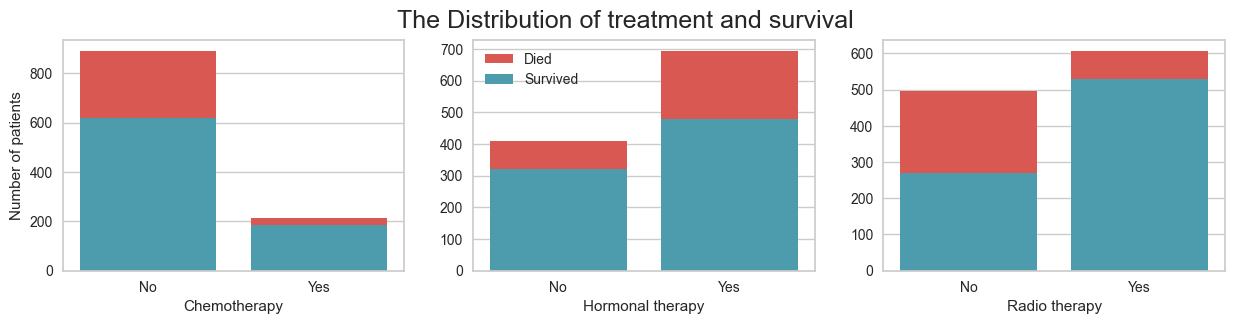

In [46]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(x= died['chemotherapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x= survived['chemotherapy'] , color=sns.color_palette(color)[5], label='Survived', ax=ax[0], saturation=0.90)

#ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(x= died['hormone_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=  survived['hormone_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(x= died['radio_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=  survived['radio_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[2], saturation=0.90)

#ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

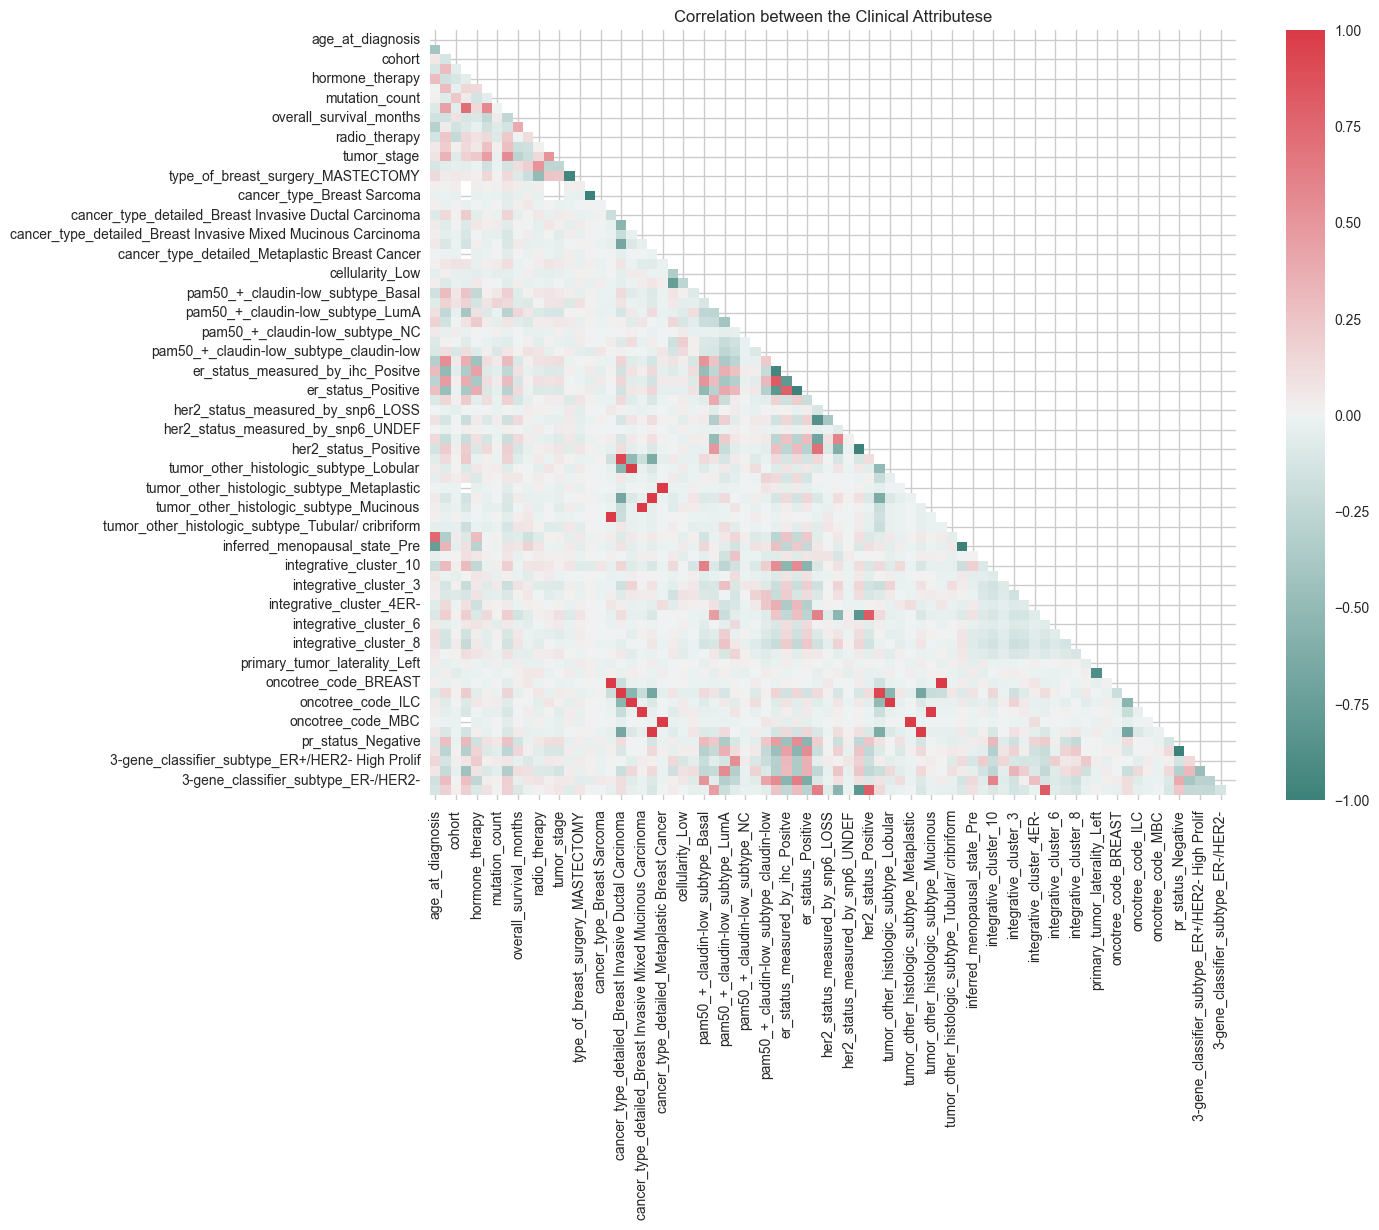

In [47]:
fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns)
#no_id_clinical_df= clinical_df.drop('ID',axis=1 )
mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = np.bool))
sns.heatmap(no_id_clinical_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We can see that there is high correlation between some of the columns.

In [48]:
Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
...,...
lymph_nodes_examined_positive,-0.164498
inferred_menopausal_state_Post,-0.170915
type_of_breast_surgery_MASTECTOMY,-0.184259
tumor_stage,-0.188790


In [49]:
Corr_df.head(20)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif,0.094463
pam50_+_claudin-low_subtype_claudin-low,0.091397
integrative_cluster_10,0.076256
pam50_+_claudin-low_subtype_LumA,0.065186
3-gene_classifier_subtype_ER-/HER2-,0.065135


In [50]:
Corr_df.tail(10)

,Correlation
pam50_+_claudin-low_subtype_Her2,-0.091694
3-gene_classifier_subtype_ER+/HER2- High Prolif,-0.095318
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361
lymph_nodes_examined_positive,-0.164498
inferred_menopausal_state_Post,-0.170915
type_of_breast_surgery_MASTECTOMY,-0.184259
tumor_stage,-0.188790
age_at_diagnosis,-0.303666


There is a positive correlation between survival and overall survival in months, conserving surgery type, pre menopaus status, but a negative correlation between survival and lymph nodes examined positive, mastectomy surgery type, tumor stage, and age at diagnosis.

In [51]:
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_clinical_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
clinical_df[num_clinical_columns].describe(). T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00


In [52]:
cat_clinical_columns.extend(clinical_df.select_dtypes(include=['object']).columns.tolist())
clinical_df[cat_clinical_columns].astype('category').describe().T

,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103
radio_therapy,1904,2,1,1137
tumor_stage,1403.0,5.0,2.0,800.0
type_of_breast_surgery,1882,2,MASTECTOMY,1127
cancer_type,1904,2,Breast Cancer,1903
cancer_type_detailed,1889,6,Breast Invasive Ductal Carcinoma,1500


In [53]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = clinical_df[(clinical_df['chemotherapy']==0) & (clinical_df['hormone_therapy']==0) & (clinical_df['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival in this group: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline Proportion of survival in all groups: ", ("%.3f" %np.mean(clinical_df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival in this group:  0.381
Baseline Proportion of survival in all groups:  0.421


In [54]:
#what the average patient looks like
print("Mean age: " + "%.3f" %np.mean(clinical_df['age_at_diagnosis']))
print("Most occurring tumour stage: " , stats.mode(clinical_df['tumor_stage'])[0][0].astype(int))
print("Most occurring histopathological type: " , stats.mode(clinical_df['neoplasm_histologic_grade'])[0][0].astype(int))
print("Mean tumour diameter: " + "%.3f" %np.mean(clinical_df['tumor_size']))
print("Probability of survival: "+ "%.3f" %(clinical_df["overall_survival"].value_counts()/clinical_df["overall_survival"].count()).iloc[1])

Mean age: 61.087
Most occurring tumour stage:  2
Most occurring histopathological type:  3
Mean tumour diameter: 26.239
Probability of survival: 0.421


The average breast cancer patient in the dataset is a 61-year-old women with a stage 2 tumor with 2 lymph nodes examined positive, with a mean tumor size of 26 mm. The patient has a probability of 76% of not having chemotherapy as a treatment, but only hormonal and radiotherapy with surgery.

In [55]:
#Finding number of outliers in each column
Q1 = clinical_df.quantile(0.25)
Q3 = clinical_df.quantile(0.75)
IQR = Q3 - Q1
((clinical_df < (Q1 - 1.5 * IQR)) | (clinical_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(7)

chemotherapy                      396
lymph_nodes_examined_positive     210
tumor_size                        142
mutation_count                     62
tumor_stage                         9
age_at_diagnosis                    1
tumor_other_histologic_subtype      0
dtype: int64

### Preprocessing and Modeling

In [56]:
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

0    0.579307
1    0.420693
Name: overall_survival, dtype: float64


a) Classification with only clinical attributes

In [57]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)

In [58]:
# data splitting
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']


In [59]:
X.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,...,oncotree_code_MDLC,oncotree_code_nan,pr_status_Negative,pr_status_Positive,pr_status_nan,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,0,0,0,1,0,1,0,0,0,0
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,0,0,0,1,0,0,0,0,0,1
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,1,0,0,1,0,0,0,0,0,1
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,1,...,1,0,0,1,0,1,0,0,0,0
5,78.77,0,1.0,3.0,1,0.0,4.0,4.062,7.800000,1,...,0,0,0,1,0,1,0,0,0,0


In [60]:
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [61]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

In [62]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.75       0.72727273 0.77714286 0.68571429 0.76571429]
CV Standard Deviation:  0.032381808910587555

CV Mean score:  0.7411688311688311
Train score:    1.0
Test score:     0.7453703703703703

Confusion Matrix: 
[[199  46]
 [ 64 123]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       245
           1       0.73      0.66      0.69       187

    accuracy                           0.75       432
   macro avg       0.74      0.73      0.74       432
weighted avg       0.74      0.75      0.74       432

